In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import math
from collections import Counter

# The Task

The Task is to look for the most prominent Edge direction in the given images.

# The Solution

- Import the given images
- Convert the images to greyscale
- Use the sobel filter to compute the most present angles
- Show the angles in a diagram
- Extract the most prevalent angle
- Rotate the image by this angle (inversed)
- Blend the image with the input

In [2]:
def read_image_grayscale(filename):
    return cv.imread(filename, 0)

In [3]:
def show_image_greyscale(image):
    plt.imshow(image, cmap='gray')
    plt.show()


def save_image(filename, image):
    cv.imwrite(filename, image)

Apply the sobel filter to the image in x and y direction. Scale the filtered images. Output a combined image as well.

In [4]:
def apply_sobel(image):
    out_x = cv.Sobel(image, cv.CV_64F, 1, 0)
    out_y = cv.Sobel(image, cv.CV_64F, 0, 1)
    out_x = cv.convertScaleAbs(out_x)
    out_y = cv.convertScaleAbs(out_y)
    out_combined = cv.addWeighted(out_x, 0.5, out_y, 0.5, 0)
    return out_x, out_y, out_combined

Compute magnitudes and directions of the computed x-aligned and y-aligned sobel images.

In [5]:
def mag_dir(out_x, out_y):
    """
    Calculate gradient magnitude and direction matrix
    """

    magnitude = np.sqrt(np.add(np.square(out_x), np.square(out_y)))
    angles = np.arctan2(out_y, out_x)
    angles = np.multiply(angles, 180/math.pi)

    return magnitude, angles


Add a convenience function to sort and display the most prevalent angles

In [6]:
def rd(x, base):
    return int(base * round(float(x)/base))


def show_histogram(angles):
    flattened_angles = angles.flatten().astype(int)
    counter = Counter(flattened_angles)
    items_sorted_by_value = sorted(counter.items(), key=lambda kv: kv[1])
    angles = list()
    values = list()
    for item in items_sorted_by_value:
        angles.append(item[0])
        values.append(item[1])
    plt.bar(angles, values)
    plt.show()

Compute the most prevalent angle in the image:
1. Flatten all angles (directions) because the input array is an array of nested arrays
2. Sort angles by their prevalences
3. Output the most prevalent angle

In [7]:
def most_prevalent_angle(angles):
    flattened_angles = angles.flatten().astype(int)
    counter = Counter(flattened_angles)   
    items_sorted_by_value = sorted(counter.items(), key=lambda kv: kv[1])
    return items_sorted_by_value[-1][0]

Add a convenience function for image rotation.

In [8]:
def rotate_image(image, angle):
    rows, cols = image.shape
    rotation_matrix = cv.getRotationMatrix2D((cols/2, rows/2), angle, 1)
    return cv.warpAffine(image, rotation_matrix, (cols, rows))

Combine all methods. 

In [9]:
def solve_task(image):
    show_image_greyscale(image)
    out_x, out_y, out_combined = apply_sobel(image)
    magnitude, angles = mag_dir(out_x, out_y)
    angle = most_prevalent_angle(angles)
    print("The most prevalent angle is {}°.".format(angle))
    
    print("Computing the histogram...")
    show_histogram(angles)
    
    print("Rotating the image by {}°...".format(angle))
    rotated_image = rotate_image(image, -angle)
    show_image_greyscale(rotated_image)
    
    print("Combining the input image and the combined filters")
    combined_image = cv.addWeighted(image, 0.5, out_combined, 0.5, 0)
    show_image_greyscale(combined_image)

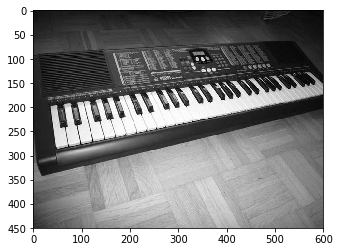

The most prevalent angle is 44°.
Computing the histogram...


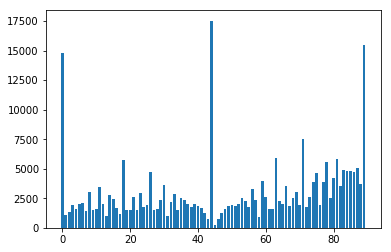

Rotating the image by 44°...


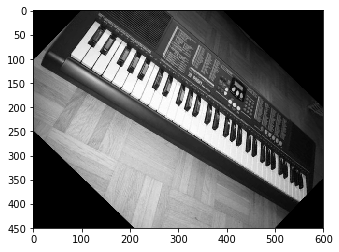

Combining the input image and the combined filters


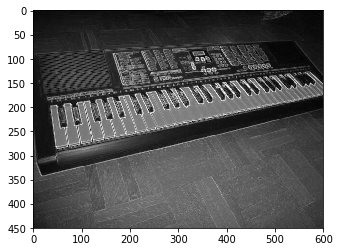

In [10]:
image = read_image_grayscale("images/keyb7.jpg")
solve_task(image)

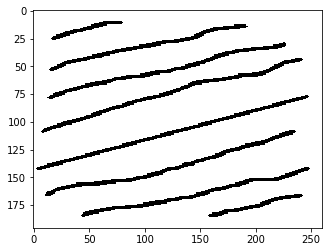

The most prevalent angle is 0°.
Computing the histogram...


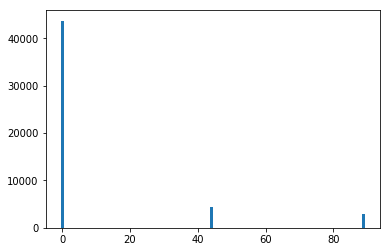

Rotating the image by 0°...


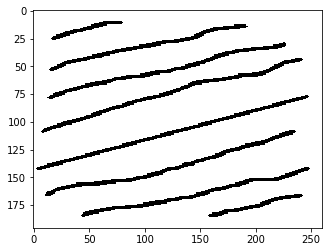

Combining the input image and the combined filters


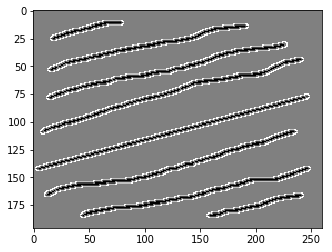

In [11]:
image = read_image_grayscale("images/lines1.png")
solve_task(image)

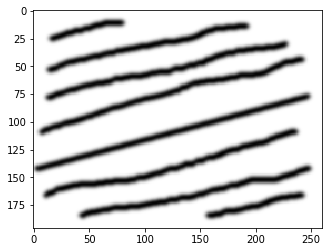

The most prevalent angle is 0°.
Computing the histogram...


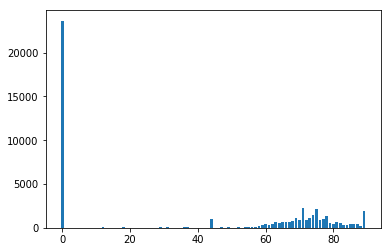

Rotating the image by 0°...


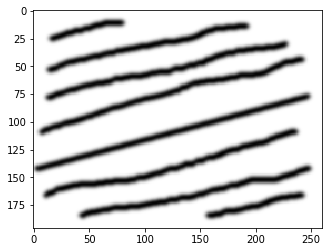

Combining the input image and the combined filters


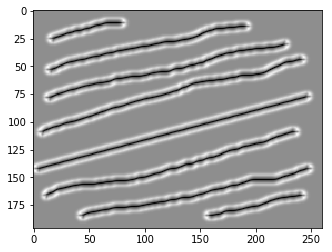

In [12]:
image = read_image_grayscale("images/lines2.png")
solve_task(image)

This task was solved with the help of [stackoverflow](https://stackoverflow.com/questions/40489047/implement-angle-constraint-in-the-sobel-operator).